In [431]:
import numpy as np
import pandas as pd
from biosppy.signals import emg
from biosppy import plotting
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans

In [432]:
from pathlib import Path

data_folder = Path("FastBaudEMG/")

file_to_open = data_folder / "TripleREST.txt"

f = open(file_to_open)

print(f.read())

2
a0.71
b0.55
c1.06
a0.72
b0.56
c1.07
a0.73
b0.56
c1.07
a0.72
b0.55
c1.06
a0.71
b0.53
c1.01
a0.69
b0.55
c1.03
a0.71
b0.57
c1.07
a0.71
b0.54
c1.01
a0.68
b0.56
c1.04
a0.70
b0.57
c1.07
a0.71
b0.54
c1.01
a0.68
b0.56
c1.04
a0.70
b0.56
c1.07
a0.71
b0.54
c1.02
a0.68
b0.55
c1.04
a0.70
b0.56
c1.07
a0.71
b0.54
c1.02
a0.68
b0.55
c1.04
a0.69
b0.56
c1.07
a0.72
b0.54
c1.02
a0.68
b0.54
c1.05
a0.70
b0.56
c1.07
a0.72
b0.55
c1.03
a0.68
b0.54
c1.05
a0.70
b0.55
c1.07
a0.72
b0.55
c1.03
a0.69
b0.54
c1.05
a0.70
b0.56
c1.07
a0.73
b0.55
c1.04
a0.69
b0.53
c1.05
a0.71
b0.54
c1.07
a0.73
b0.55
c1.04
a0.69
b0.52
c1.05
a0.71
b0.54
c1.07
a0.73
b0.55
c1.04
a0.69
b0.53
c1.04
a0.71
b0.54
c1.07
a0.73
b0.56
c1.05
a0.70
b0.53
c1.04
a0.71
b0.54
c1.06
a0.73
b0.56
c1.05
a0.70
b0.53
c1.04
a0.72
b0.55
c1.06
a0.74
b0.57
c1.05
a0.71
b0.54
c1.04
a0.72
b0.56
c1.06
a0.74
b0.57
c1.06
a0.71
b0.54
c1.03
a0.73
b0.56
c1.05
a0.74
b0.57
c1.06
a0.72
b0.54
c1.02
a0.74
b0.56
c1.04
a0.75
b0.57
c1.06
a0.73
b0.54
c1.01
a0.73
b0.56
c1.04
a0.75
b0

In [433]:
f = open("ARest.txt","w+")
f1 = open("BRest.txt", "w+")
f2 = open("CRest.txt", "w+")
import fileinput
for lines in fileinput.FileInput('FastBaudEMG/TripleREST.txt', inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a':  f.write(lines[1:] + "\n")
    if lines[0] == 'b':  f1.write(lines[1:] + "\n")
    if lines[0] == 'c':  f2.write(lines[1:] + "\n")
    print(lines)

In [434]:
Arest = np.loadtxt('ARest.txt')
Brest = np.loadtxt('BRest.txt')
Crest = np.loadtxt('CRest.txt')

In [435]:
#Calculate RestAvg
Arestavg = np.average(Arest)
Brestavg = np.average(Brest)
Crestavg = np.average(Crest)
Arestavg


0.7642912344925769

## Process and Strip Triple Index Hard into ATIH, BTIH and CTIH

In [436]:
ATIH = np.array([0])
BTIH = np.array([0])
CTIH = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleIndexHard1.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATIH = np.append(ATIH, [float(lines[1:])])
    if lines[0] == 'b': BTIH = np.append(BTIH, [float(lines[1:])])
    if lines[0] == 'c': CTIH = np.append(CTIH, [float(lines[1:])])
    print(lines)
ATIH = ATIH[1:]
BTIH = BTIH[1:]
CTIH = CTIH[1:]

In [437]:
ATIH.tolist()

[0.98,
 0.99,
 1.01,
 1.02,
 1.01,
 0.96,
 0.97,
 1.0,
 0.96,
 0.97,
 1.0,
 0.95,
 0.97,
 1.0,
 0.95,
 0.98,
 1.0,
 0.95,
 0.98,
 1.01,
 0.96,
 0.99,
 1.0,
 0.96,
 0.98,
 1.01,
 0.97,
 1.01,
 1.03,
 0.99,
 1.03,
 1.04,
 1.01,
 1.03,
 1.05,
 1.01,
 1.01,
 1.04,
 1.02,
 1.04,
 1.06,
 1.03,
 1.02,
 1.04,
 1.03,
 1.01,
 1.01,
 1.0,
 1.0,
 1.01,
 1.0,
 0.97,
 0.98,
 0.98,
 0.94,
 0.95,
 0.98,
 0.95,
 0.97,
 0.99,
 0.94,
 0.95,
 0.96,
 0.92,
 0.93,
 0.95,
 0.9,
 0.91,
 0.94,
 0.89,
 0.9,
 0.95,
 0.9,
 0.91,
 0.95,
 0.9,
 0.91,
 0.94,
 0.9,
 0.91,
 0.97,
 0.93,
 0.95,
 0.98,
 0.94,
 0.97,
 1.0,
 0.95,
 0.97,
 1.01,
 0.97,
 0.97,
 1.0,
 0.96,
 0.97,
 0.99,
 0.96,
 0.98,
 0.98,
 0.95,
 0.95,
 0.97,
 0.95,
 0.96,
 0.98,
 0.96,
 0.97,
 0.98,
 0.98,
 0.97,
 0.98,
 0.97,
 0.95,
 0.96,
 0.96,
 0.95,
 0.97,
 0.98,
 0.94,
 0.95,
 0.98,
 0.92,
 0.95,
 0.99,
 0.95,
 0.97,
 1.0,
 0.95,
 0.97,
 1.01,
 0.95,
 0.97,
 1.02,
 0.97,
 1.0,
 1.02,
 0.96,
 0.98,
 1.02,
 0.98,
 1.0,
 1.01,
 0.96,
 0.96,
 1.01,
 1.

In [438]:
ATIH.size

5287

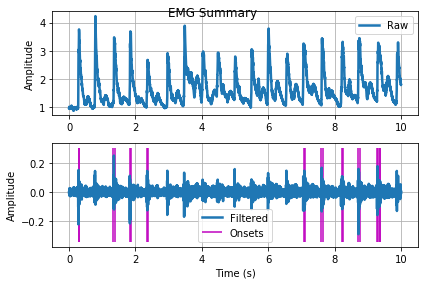

In [439]:
out = emg.emg(signal=ATIH, sampling_rate=(BTIH.size/10), show=True)

## Process and Strip Thumb Hard into ATTH, BTTH and CTTH

In [440]:
ATTH = np.array([0])
BTTH = np.array([0])
CTTH = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleThumbHard2.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATTH = np.append(ATTH, [float(lines[1:])])
    if lines[0] == 'b': BTTH = np.append(BTTH, [float(lines[1:])])
    if lines[0] == 'c': CTTH = np.append(CTTH, [float(lines[1:])])
    print(lines)
ATTH = ATTH[1:]
BTTH = BTTH[1:]
CTTH = CTTH[1:]

In [441]:
ATTH.tolist()

[0.91,
 0.9,
 0.89,
 0.88,
 0.91,
 0.92,
 0.91,
 0.89,
 0.9,
 0.89,
 0.9,
 0.92,
 0.93,
 0.91,
 0.92,
 0.93,
 0.91,
 0.92,
 0.93,
 0.89,
 0.91,
 0.93,
 0.88,
 0.91,
 0.94,
 0.91,
 0.93,
 0.95,
 0.9,
 0.92,
 0.95,
 0.9,
 0.92,
 0.96,
 0.91,
 0.93,
 0.96,
 0.91,
 0.92,
 0.96,
 0.91,
 0.94,
 0.97,
 0.93,
 0.94,
 0.96,
 0.92,
 0.93,
 0.96,
 0.92,
 0.93,
 0.95,
 0.91,
 0.93,
 0.95,
 0.91,
 0.93,
 0.94,
 0.91,
 0.92,
 0.94,
 0.91,
 0.92,
 0.94,
 0.92,
 0.92,
 0.93,
 0.91,
 0.9,
 0.92,
 0.91,
 0.89,
 0.91,
 0.92,
 0.89,
 0.92,
 0.93,
 0.9,
 0.92,
 0.93,
 0.9,
 0.93,
 0.95,
 0.91,
 0.93,
 0.96,
 0.92,
 0.93,
 0.95,
 0.91,
 0.93,
 0.96,
 0.9,
 0.92,
 0.96,
 0.92,
 0.93,
 0.96,
 0.91,
 0.93,
 0.96,
 0.92,
 0.95,
 0.95,
 0.91,
 0.91,
 0.93,
 0.89,
 0.9,
 0.91,
 0.9,
 0.92,
 0.96,
 0.93,
 0.96,
 0.99,
 0.96,
 1.03,
 1.03,
 1.0,
 1.07,
 1.07,
 1.05,
 1.07,
 1.08,
 1.06,
 1.07,
 1.06,
 1.05,
 1.09,
 1.09,
 1.09,
 1.13,
 1.14,
 1.12,
 1.11,
 1.1,
 1.09,
 1.07,
 1.12,
 1.22,
 1.26,
 1.31,
 1.34,
 1.33

In [442]:
BTTH.size

5288

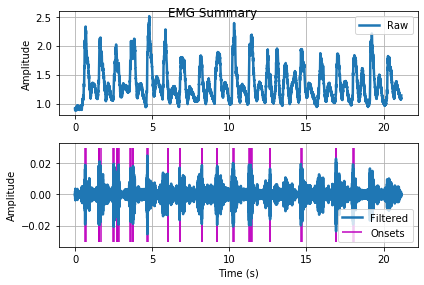

In [443]:
out = emg.emg(signal=ATTH, sampling_rate=(250), show=True)

# Process and Strip Ring Medium Hard into ATRMH, BTRMH and CTRMH

In [444]:
ATRMH = np.array([0])
BTRMH = np.array([0])
CTRMH = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleRMHard1.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATRMH = np.append(ATRMH, [float(lines[1:])])
    if lines[0] == 'b': BTRMH = np.append(BTRMH, [float(lines[1:])])
    if lines[0] == 'c': CTRMH = np.append(CTRMH, [float(lines[1:])])
    print(lines)
ATRMH = ATRMH[1:]
BTRMH = BTRMH[1:]
CTRMH = CTRMH[1:]

In [445]:
CTRMH.tolist()

[0.97,
 0.97,
 0.97,
 0.96,
 0.99,
 0.97,
 0.99,
 1.0,
 0.95,
 0.96,
 1.0,
 0.96,
 0.96,
 0.99,
 0.95,
 0.96,
 0.99,
 0.98,
 1.0,
 1.01,
 0.97,
 0.97,
 0.99,
 0.97,
 0.98,
 0.99,
 0.96,
 0.97,
 0.98,
 0.95,
 0.96,
 0.97,
 0.95,
 0.95,
 0.95,
 0.92,
 0.92,
 0.93,
 0.92,
 0.91,
 0.93,
 0.91,
 0.9,
 0.92,
 0.91,
 0.9,
 0.93,
 0.93,
 0.92,
 0.93,
 0.95,
 0.93,
 0.94,
 0.94,
 0.91,
 0.93,
 0.95,
 0.94,
 0.97,
 0.98,
 0.95,
 0.95,
 0.97,
 0.94,
 0.94,
 0.96,
 0.93,
 0.94,
 0.96,
 0.92,
 0.93,
 0.96,
 0.95,
 0.98,
 1.0,
 0.97,
 0.97,
 1.0,
 0.95,
 0.97,
 1.0,
 0.96,
 0.97,
 0.99,
 0.97,
 0.98,
 0.99,
 0.96,
 0.96,
 0.98,
 0.95,
 0.96,
 0.97,
 0.94,
 0.95,
 0.97,
 0.97,
 0.98,
 0.98,
 0.95,
 0.94,
 0.95,
 0.94,
 0.93,
 0.94,
 0.94,
 0.92,
 0.94,
 0.93,
 0.92,
 0.93,
 0.93,
 0.92,
 0.93,
 0.93,
 0.9,
 0.91,
 0.92,
 0.89,
 0.9,
 0.92,
 0.9,
 0.89,
 0.9,
 0.88,
 0.88,
 0.9,
 0.87,
 0.88,
 0.92,
 0.88,
 0.9,
 0.92,
 0.88,
 0.9,
 0.92,
 0.9,
 0.93,
 0.95,
 0.92,
 0.93,
 0.96,
 0.91,
 0.92,
 0.95,
 

In [446]:
CTRMH.size

5286

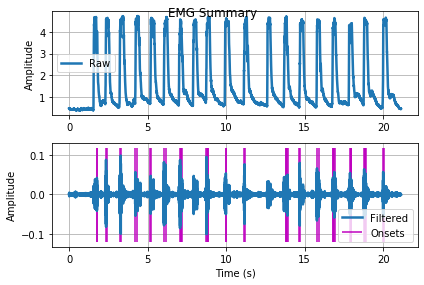

In [447]:
out = emg.emg(signal=BTRMH, sampling_rate=(250), show=True)

# Process and Strip Ring Medium Soft into ATRMS, BTRMS and CTRMS
## Use 1 or 3

In [448]:
ATRMS = np.array([0])
BTRMS = np.array([0])
CTRMS = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleRMSoft2.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATRMS = np.append(ATRMS, [float(lines[1:])])
    if lines[0] == 'b': BTRMS = np.append(BTRMS, [float(lines[1:])])
    if lines[0] == 'c': CTRMS = np.append(CTRMS, [float(lines[1:])])
    print(lines)
ATRMS = ATRMS[1:]
BTRMS = BTRMS[1:]
CTRMS = CTRMS[1:]

In [449]:
ATRMS.tolist()

[0.78,
 0.79,
 0.79,
 0.78,
 0.74,
 0.75,
 0.78,
 0.74,
 0.75,
 0.78,
 0.74,
 0.75,
 0.79,
 0.75,
 0.76,
 0.79,
 0.76,
 0.77,
 0.8,
 0.77,
 0.77,
 0.81,
 0.78,
 0.78,
 0.81,
 0.78,
 0.78,
 0.8,
 0.76,
 0.77,
 0.8,
 0.76,
 0.76,
 0.8,
 0.77,
 0.78,
 0.8,
 0.76,
 0.78,
 0.8,
 0.77,
 0.78,
 0.8,
 0.77,
 0.78,
 0.78,
 0.76,
 0.76,
 0.78,
 0.77,
 0.77,
 0.79,
 0.78,
 0.78,
 0.79,
 0.79,
 0.79,
 0.8,
 0.81,
 0.79,
 0.81,
 0.82,
 0.8,
 0.8,
 0.83,
 0.8,
 0.81,
 0.84,
 0.8,
 0.81,
 0.83,
 0.8,
 0.8,
 0.83,
 0.79,
 0.79,
 0.83,
 0.79,
 0.79,
 0.83,
 0.78,
 0.79,
 0.83,
 0.79,
 0.79,
 0.82,
 0.77,
 0.78,
 0.82,
 0.79,
 0.79,
 0.82,
 0.79,
 0.79,
 0.83,
 0.79,
 0.81,
 0.83,
 0.79,
 0.8,
 0.82,
 0.78,
 0.8,
 0.81,
 0.78,
 0.79,
 0.82,
 0.8,
 0.8,
 0.81,
 0.8,
 0.8,
 0.82,
 0.81,
 0.81,
 0.82,
 0.81,
 0.81,
 0.82,
 0.81,
 0.79,
 0.8,
 0.8,
 0.79,
 0.8,
 0.81,
 0.78,
 0.79,
 0.82,
 0.79,
 0.81,
 0.83,
 0.79,
 0.79,
 0.81,
 0.77,
 0.78,
 0.81,
 0.77,
 0.79,
 0.82,
 0.79,
 0.8,
 0.83,
 0.8,
 0.8,
 0.8

In [450]:
BTRMS.size

5288

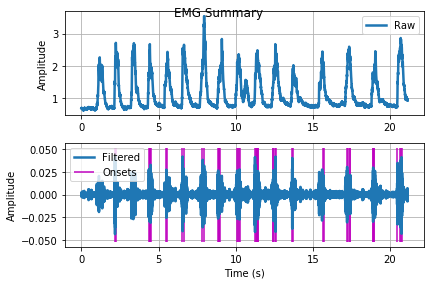

In [451]:
out = emg.emg(signal=BTRMS, sampling_rate=(250), show=True)

# Process and Strip Open Wrist Flex into AOWF, BOWF and COWF

In [452]:
ATOWF = np.array([0])
BTOWF = np.array([0])
CTOWF = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleOpenWristFlex2.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATOWF = np.append(ATOWF, [float(lines[1:])])
    if lines[0] == 'b': BTOWF = np.append(BTOWF, [float(lines[1:])])
    if lines[0] == 'c': CTOWF = np.append(CTOWF, [float(lines[1:])])
    print(lines)
ATOWF = ATOWF[1:]
BTOWF = BTOWF[1:]
CTOWF = CTOWF[1:]

In [453]:
ATOWF.tolist()

[1.09,
 1.08,
 1.11,
 1.12,
 1.11,
 1.13,
 1.1,
 1.11,
 1.12,
 1.09,
 1.1,
 1.11,
 1.06,
 1.08,
 1.1,
 1.06,
 1.09,
 1.09,
 1.05,
 1.09,
 1.08,
 1.04,
 1.07,
 1.06,
 1.03,
 1.05,
 1.04,
 1.01,
 1.05,
 1.05,
 1.02,
 1.05,
 1.06,
 1.03,
 1.06,
 1.06,
 1.04,
 1.05,
 1.06,
 1.03,
 1.04,
 1.06,
 1.04,
 1.05,
 1.07,
 1.06,
 1.06,
 1.08,
 1.07,
 1.06,
 1.07,
 1.08,
 1.06,
 1.08,
 1.08,
 1.05,
 1.08,
 1.08,
 1.05,
 1.08,
 1.09,
 1.05,
 1.07,
 1.09,
 1.05,
 1.08,
 1.09,
 1.05,
 1.08,
 1.08,
 1.05,
 1.09,
 1.09,
 1.06,
 1.08,
 1.1,
 1.07,
 1.1,
 1.09,
 1.06,
 1.07,
 1.06,
 1.03,
 1.06,
 1.07,
 1.02,
 1.06,
 1.06,
 1.03,
 1.05,
 1.05,
 1.01,
 1.04,
 1.05,
 1.01,
 1.03,
 1.04,
 1.01,
 1.03,
 1.05,
 1.04,
 1.05,
 1.06,
 1.03,
 1.02,
 1.03,
 1.0,
 0.98,
 1.01,
 1.01,
 0.99,
 1.01,
 1.0,
 0.97,
 0.99,
 0.99,
 0.97,
 1.0,
 1.01,
 0.97,
 1.0,
 1.02,
 0.99,
 1.02,
 1.03,
 1.0,
 1.03,
 1.03,
 1.01,
 1.08,
 1.07,
 1.05,
 1.1,
 1.09,
 1.07,
 1.13,
 1.1,
 1.09,
 1.14,
 1.15,
 1.1,
 1.09,
 1.2,
 1.2,
 1.19,


In [454]:
CTOWF.size

5288

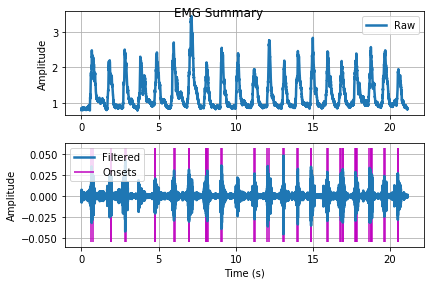

In [455]:
out = emg.emg(signal=BTOWF, sampling_rate=(250), show=True)

In [456]:
classvar = np.zeros(len(ATIH), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

# Start with Triple Index Hard

In [457]:
ATIH.size

5287

In [458]:
dfTIH = pd.DataFrame({'AData':ATIH, 'BData':BTIH, 'CData':CTIH, 'class':classvar, 'MAVA':classvar, 'MAVB':classvar, 'MAVC':classvar, 'MAVSA':classvar, 'MAVSB':classvar, 'MAVSC':classvar,'SSIA':classvar, 'SSIB':classvar, 'SSIC':classvar, 'VARA':classvar, 'VARB':classvar, 'VARC':classvar,'RMSA':classvar, 'RMSB':classvar, 'RMSC':classvar, 'WLA':classvar, 'WLB':classvar, 'WLC':classvar, 'Trigger':classvar})


In [459]:
#df.loc[12:25,'class'] = 0

In [462]:
with pd.option_context("display.max_rows", 1000):
    display(dfTIH)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0      0.98   0.83   1.48      0     0     0     0      0      0      0  ...   
1      0.99   0.85   1.50      0     0     0     0      0      0      0  ...   
2      1.01   0.87   1.52      0     0     0     0      0      0      0  ...   
3      1.02   0.87   1.53      0     0     0     0      0      0      0  ...   
4      1.01   0.85   1.47      0     0     0     0      0      0      0  ...   
...     ...    ...    ...    ...   ...   ...   ...    ...    ...    ...  ...   
5282   1.82   1.17   1.70      0     0     0     0      0      0      0  ...   
5283   1.83   1.18   1.66      0     0     0     0      0      0      0  ...   
5284   1.82   1.15   1.64      0     0     0     0      0      0      0  ...   
5285   1.79   1.20   1.67      0     0     0     0      0      0      0  ...   
5286   1.80   1.22   1.65      0     0     0     0      0      0      0  ...   

      VARA  VARB  VARC  RMSA  RMSB  RMSC  WLA  WLB  WLC  Trigger  
0        0     0     0     0     0     0    0    0    0        0  
1        0     0     0     0     0     0    0    0    0        0  
2        0     0     0     0     0     0    0    0    0        0  
3        0     0     0     0     0     0    0    0    0        0  
4        0     0     0     0     0     0    0    0    0        0  
...    ...   ...   ...   ...   ...   ...  ...  ...  ...      ...  
5282     0     0     0     0     0     0    0    0    0        0  
5283     0     0     0     0     0     0    0    0    0        0  
5284     0     0     0     0     0     0    0    0    0        0  
5285     0     0     0     0     0     0    0    0    0        0  
5286     0     0     0     0     0     0    0    0    0        0  

[5287 rows x 23 columns]

# We want to determine our Onset on EMG A since it is what triggers the hardest

In [465]:
for index, row in dfTIH.iterrows():
    if row['AData'] > (1+Arestavg):
        dfTIH.loc[index, 'class'] = 1

In [466]:
with pd.option_context("display.max_rows", 1000):
    display(dfTIH)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0      0.98   0.83   1.48      0     0     0     0      0      0      0  ...   
1      0.99   0.85   1.50      0     0     0     0      0      0      0  ...   
2      1.01   0.87   1.52      0     0     0     0      0      0      0  ...   
3      1.02   0.87   1.53      0     0     0     0      0      0      0  ...   
4      1.01   0.85   1.47      0     0     0     0      0      0      0  ...   
...     ...    ...    ...    ...   ...   ...   ...    ...    ...    ...  ...   
5282   1.82   1.17   1.70      1     0     0     0      0      0      0  ...   
5283   1.83   1.18   1.66      1     0     0     0      0      0      0  ...   
5284   1.82   1.15   1.64      1     0     0     0      0      0      0  ...   
5285   1.79   1.20   1.67      1     0     0     0      0      0      0  ...   
5286   1.80   1.22   1.65      1     0     0     0      0      0      0  ...   

      VARA  VARB  VARC  RMSA  RMSB  RMSC  WLA  WLB  WLC  Trigger  
0        0     0     0     0     0     0    0    0    0        0  
1        0     0     0     0     0     0    0    0    0        0  
2        0     0     0     0     0     0    0    0    0        0  
3        0     0     0     0     0     0    0    0    0        0  
4        0     0     0     0     0     0    0    0    0        0  
...    ...   ...   ...   ...   ...   ...  ...  ...  ...      ...  
5282     0     0     0     0     0     0    0    0    0        0  
5283     0     0     0     0     0     0    0    0    0        0  
5284     0     0     0     0     0     0    0    0    0        0  
5285     0     0     0     0     0     0    0    0    0        0  
5286     0     0     0     0     0     0    0    0    0        0  

[5287 rows x 23 columns]

In [467]:
print(len(df.index))


5287


In [468]:
#Calculate MAV
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + dfTIH.loc[index+index2, 'AData']
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'MAVA'] = sum/50
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + dfTIH.loc[index+index2, 'BData']
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'MAVB'] = sum/50
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + dfTIH.loc[index+index2, 'CData']
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'MAVC'] = sum/50

In [469]:
#Calculate MAVS
for index, row in dfTIH.iterrows():
    if(index+1 < len(dfTIH.index)):
        mavs = dfTIH.loc[index+1, 'MAVA'] - dfTIH.loc[index, 'MAVA']
        dfTIH.loc[index, 'MAVSA'] = mavs
for index, row in dfTIH.iterrows():
    if(index+1 < len(dfTIH.index)):
        mavs = dfTIH.loc[index+1, 'MAVB'] - dfTIH.loc[index, 'MAVB']
        dfTIH.loc[index, 'MAVSB'] = mavs
for index, row in dfTIH.iterrows():
    if(index+1 < len(dfTIH.index)):
        mavs = dfTIH.loc[index+1, 'MAVC'] - dfTIH.loc[index, 'MAVC']
        dfTIH.loc[index, 'MAVSC'] = mavs

In [470]:
#Calculate SSI
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + abs(dfTIH.loc[index+index2, 'AData'])**2
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'SSIA'] = sum
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + abs(dfTIH.loc[index+index2, 'BData'])**2
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'SSIB'] = sum
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + abs(dfTIH.loc[index+index2, 'CData'])**2
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'SSIC'] = sum

In [471]:
#Calculate VAR
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + abs(dfTIH.loc[index+index2, 'AData'])**2
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'VARA'] = sum/49
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + abs(dfTIH.loc[index+index2, 'BData'])**2
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'VARB'] = sum/49
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + abs(dfTIH.loc[index+index2, 'CData'])**2
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'VARC'] = sum/49

In [472]:
#Calculate RMS
for index, row in dfTIH.iterrows():
    tmp = dfTIH.loc[index, 'SSIA']/50
    final = np.sqrt(tmp)
    dfTIH.loc[index, 'RMSA'] = final
for index, row in dfTIH.iterrows():
    tmp = dfTIH.loc[index, 'SSIB']/50
    final = np.sqrt(tmp)
    dfTIH.loc[index, 'RMSB'] = final
for index, row in dfTIH.iterrows():
    tmp = dfTIH.loc[index, 'SSIC']/50
    final = np.sqrt(tmp)
    dfTIH.loc[index, 'RMSC'] = final

In [473]:
#Calculate WL
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(dfTIH.index)):
            sum = sum + abs((dfTIH.loc[index+index2, 'AData'] + dfTIH.loc[index+index2+1, 'AData']))
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'WLA'] = sum/50
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(dfTIH.index)):
            sum = sum + abs((dfTIH.loc[index+index2, 'BData'] + dfTIH.loc[index+index2+1, 'BData']))
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'WLB'] = sum/50
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(dfTIH.index)):
            sum = sum + abs((dfTIH.loc[index+index2, 'CData'] + dfTIH.loc[index+index2+1, 'CData']))
    if(index+index2 < len(dfTIH.index)):
        dfTIH.loc[index+index2, 'WLC'] = sum/50

In [474]:
#Calculate Trigger
for index, row in dfTIH.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(dfTIH.index)):
            sum = sum + dfTIH.loc[index+index2, 'class']
    if(index+index2 < len(dfTIH.index)):
        if(sum/10 > .75):
            dfTIH.loc[index+index2, 'Trigger'] = 1
        else:
            dfTIH.loc[index+index2, 'Trigger'] = 0

In [475]:
pd.options.display.max_rows = 999
pd.options.display.max_rows

999

In [476]:
pd.set_option('display.max_rows', None)
dfTIH

AData  BData  CData  class    MAVA    MAVB    MAVC         MAVSA  \
0      0.98   0.83   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
1      0.99   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
2      1.01   0.87   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
3      1.02   0.87   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
4      1.01   0.85   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
5      0.96   0.83   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
6      0.97   0.85   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
7      1.00   0.85   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
8      0.96   0.83   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
9      0.97   0.84   1.55      0  0.0000  0.0000  0.0000  0.000000e+00   
10     1.00   0.84   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
11     0.95   0.81   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
12     0.97   0.85   1.54      0  0.0000  0.0000  0.0000  0.000000e+00   
13     1.00   0.87   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
14     0.95   0.83   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
15     0.98   0.83   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
16     1.00   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
17     0.95   0.80   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
18     0.98   0.83   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
19     1.01   0.86   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
20     0.96   0.82   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
21     0.99   0.84   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
22     1.00   0.86   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
23     0.96   0.81   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
24     0.98   0.86   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
25     1.01   0.89   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
26     0.97   0.85   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
27     1.01   0.88   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
28     1.03   0.89   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
29     0.99   0.85   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
30     1.03   0.87   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
31     1.04   0.87   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
32     1.01   0.84   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
33     1.03   0.87   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
34     1.05   0.90   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
35     1.01   0.85   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
36     1.01   0.88   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
37     1.04   0.90   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
38     1.02   0.86   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
39     1.04   0.89   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
40     1.06   0.90   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
41     1.03   0.87   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
42     1.02   0.89   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
43     1.04   0.90   1.54      0  0.0000  0.0000  0.0000  0.000000e+00   
44     1.03   0.86   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
45     1.01   0.88   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
46     1.01   0.89   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
47     1.00   0.85   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
48     1.00   0.87   1.48      0  0.0000  0.0000  0.0000  1.001000e+00   
49     1.01   0.88   1.51      0  1.0010  0.8582  1.5018  4.000000e-04   
50     1.00   0.84   1.43      0  1.0014  0.8584  1.5008 -4.000000e-04   
51     0.97   0.87   1.46      0  1.0010  0.8588  1.5000 -6.000000e-04   
52     0.98   0.86   1.49      0  1.0004  0.8586  1.4994 -8.000000e-04   
53     0.9

In [31]:
soft.size

9250

In [32]:
soft1, soft2, soft3, soft4 = np.split(soft[0:9248],4)

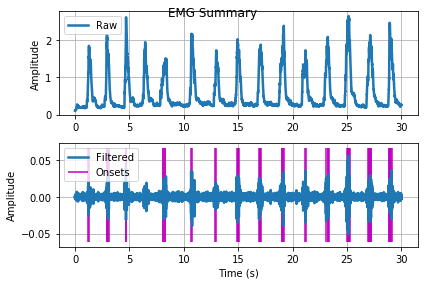

In [33]:
out = emg.emg(signal=soft, sampling_rate=(soft.size/30), show=True)

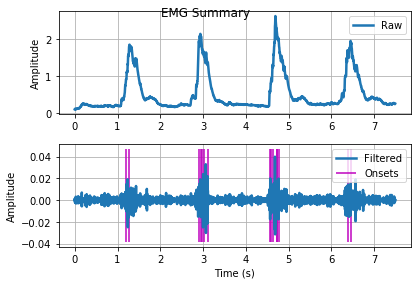

In [34]:
out = emg.emg(signal=soft1, sampling_rate=(soft.size/30), show=True)

In [35]:
classvar = np.zeros(len(soft), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
dfs = pd.DataFrame({'data':soft, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})

In [37]:
for index, row in dfs.iterrows():
    if row['data'] > (1.0+restavg):
        dfs.loc[index, 'class'] = 1

In [38]:
#dfs
#with pd.option_context("display.max_rows", 1000):
#    display(dfs)

In [39]:
#Calculate MAV
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        dfs.loc[index+index2, 'MAV'] = sum/50

In [40]:
#Calculate MAVS
for index, row in dfs.iterrows():
    if(index+1 < len(dfs.index)):
        mavs = dfs.loc[index+1, 'MAV'] - dfs.loc[index, 'MAV']
        dfs.loc[index, 'MAVS'] = mavs

In [41]:
#Calculate SSI
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'SSI'] = sum

In [42]:
#Calculate VAR
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'VAR'] = sum/49

In [43]:
#Calculate RMS
for index, row in dfs.iterrows():
    tmp = dfs.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    dfs.loc[index, 'RMS'] = final

In [44]:
#Calculate WL
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(dfs.index)):
            sum = sum + abs((dfs.loc[index+index2, 'data'] + dfs.loc[index+index2+1, 'data']))
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'WL'] = sum/50

In [45]:
#Calculate Trigger
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'class']
    if(index+index2 < len(dfs.index)):
        if(sum/10 > .75):
            dfs.loc[index+index2, 'Trigger'] = 2
        else:
            dfs.loc[index+index2, 'Trigger'] = 0

In [46]:
#dfs
with pd.option_context("display.max_rows", 1000):
    display(dfs)

data  class     MAV          MAVS     SSI       VAR       RMS      WL  \
0     0.11    0.0  0.0000  0.000000e+00  0.0000  0.000000  0.000000  0.0000   
1     0.12    0.0  0.0000  0.000000e+00  0.0000  0.000000  0.000000  0.0000   
2     0.12    0.0  0.0000  0.000000e+00  0.0000  0.000000  0.000000  0.0000   
3     0.12    0.0  0.0000  0.000000e+00  0.0000  0.000000  0.000000  0.0000   
4     0.11    0.0  0.0000  0.000000e+00  0.0000  0.000000  0.000000  0.0000   
...    ...    ...     ...           ...     ...       ...       ...     ...   
9246  0.26    0.0  0.2402 -5.551115e-17  2.8989  0.059161  0.240786  0.4804   
9247  0.26    0.0  0.2402  2.000000e-04  2.8989  0.059161  0.240786  0.4806   
9248  0.27    0.0  0.2404  0.000000e+00  2.9042  0.059269  0.241006  0.4808   
9249  0.26    0.0  0.2404 -5.200000e-03  2.9042  0.059269  0.241006     NaN   
9250   NaN    NaN  0.2352           NaN     NaN       NaN       NaN     NaN   

      Trigger  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
9246      0.0  
9247      0.0  
9248      0.0  
9249      0.0  
9250      0.0  

[9251 rows x 9 columns]

In [47]:
#df = df.drop(['class'], axis=1)
#dfs = dfs.drop(['class'], axis=1)
df.dtypes

data       float64
class        int64
MAV        float64
MAVS       float64
SSI        float64
VAR        float64
RMS        float64
WL         float64
Trigger      int64
dtype: object

In [48]:
train = df.loc[0:len(df.index)*.75]
len(train)

6939

In [49]:
test = df.loc[len(train.index):len(df.index)]
len(test)

2312

In [50]:
trains = dfs.loc[0:len(dfs.index)*.75]
len(trains)

6939

In [51]:
tests = dfs.loc[len(trains.index):len(dfs.index)]
len(tests)

2312

In [52]:
train = train.append(trains,ignore_index=True)

In [53]:
test = test.append(tests,ignore_index=True)

In [54]:
len(train)

13878

In [55]:
len(test)

4624

In [56]:
target = train.pop('Trigger')

In [57]:
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13873    0.0
13874    0.0
13875    0.0
13876    0.0
13877    0.0
Name: Trigger, Length: 13878, dtype: float64

In [58]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, target)

In [59]:
test = test.dropna()
answers = test.pop("Trigger")
test

data  class     MAV          MAVS       SSI       VAR       RMS      WL
0     3.54    1.0  2.8908  3.920000e-02  449.8790  9.181204  2.999597  5.8208
1     3.43    1.0  2.9300  3.720000e-02  459.4830  9.377204  3.031445  5.8972
2     3.31    1.0  2.9672  3.820000e-02  468.3366  9.557890  3.060512  5.9726
3     3.35    1.0  3.0054  3.800000e-02  477.4855  9.744602  3.090261  6.0488
4     3.38    1.0  3.0434  4.060000e-02  486.7195  9.933051  3.119998  6.1274
...    ...    ...     ...           ...       ...       ...       ...     ...
4617  0.26    0.0  0.2406 -4.000000e-04    2.9093  0.059373  0.241218  0.4808
4618  0.25    0.0  0.2402  0.000000e+00    2.8989  0.059161  0.240786  0.4804
4619  0.26    0.0  0.2402 -5.551115e-17    2.8989  0.059161  0.240786  0.4804
4620  0.26    0.0  0.2402  2.000000e-04    2.8989  0.059161  0.240786  0.4806
4621  0.27    0.0  0.2404  0.000000e+00    2.9042  0.059269  0.241006  0.4808

[4622 rows x 8 columns]

In [60]:
clf.score(test, answers)

0.9833405452185201

In [61]:
predictions = clf.predict(test)
predictions = np.asarray(predictions)
predictions = pd.DataFrame(predictions)

In [62]:
answers = pd.DataFrame(answers)

In [72]:
compare = pd.concat([predictions, answers], axis=1, sort=False)
with pd.option_context("display.max_rows", 4000):
    display(compare)

0  Trigger
0     1.0      1.0
1     1.0      1.0
2     1.0      1.0
3     1.0      1.0
4     1.0      1.0
...   ...      ...
4617  0.0      0.0
4618  0.0      0.0
4619  0.0      0.0
4620  0.0      0.0
4621  0.0      0.0

[4622 rows x 2 columns]

In [64]:
print(dict(zip(train.columns, clf.feature_importances_)))

{'data': 0.201589242630464, 'class': 0.6403221856671436, 'MAV': 0.04865244798468204, 'MAVS': 0.008526845051491764, 'SSI': 0.008888372778398523, 'VAR': 0.02358432279123346, 'RMS': 0.002838539980594981, 'WL': 0.06559804311599163}


0.9833405452185201

In [66]:
import pickle
filename = 'finalized_modelv2.sav'
pickle.dump(clf,open(filename, 'wb'))
clf3 = pickle.load(open(filename, 'rb'))
clf3.score(test, answers)

0.9833405452185201

In [67]:
clf2.predict([[0.20,0.0,.268,.00002,2.89,.059,.2407,.480]])

array([0.])

In [71]:
import struct;
print (struct.calcsize("P") * 8)

64


In [68]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train)

In [69]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)